# What is Vanishing Gradient Problem?

The vanishing gradient problem is a challenge that arises during the training of deep neural networks, particularly those with many layers. It refers to the issue where the gradients of the loss function become extremely small as they are backpropagated from the later layers to the earlier layers of the network. Consequently, the weights in the early layers receive minimal updates, impeding effective learning.

When backpropagating gradients, the algorithm multiplies the gradients at each layer with the weight matrices as it moves backward through the network. This multiplication can result in the gradients becoming exponentially smaller as they propagate backward, especially when using activation functions with limited ranges such as the sigmoid function.

As a consequence of the vanishing gradients, the early layers of the network may fail to learn meaningful representations or fail to update their weights significantly during training. This issue is particularly prominent in deep networks with many layers, making it difficult to train them effectively.

The vanishing gradient problem was recognized as one of the major obstacles in training deep neural networks until the development of new techniques that helped mitigate its impact. Some approaches to addressing the vanishing gradient problem include:

1. Activation functions: Replacing sigmoid or tanh activation functions with alternatives that have a larger range, such as ReLU (Rectified Linear Unit), can alleviate the vanishing gradient problem. ReLU and its variants allow gradients to flow more freely and reduce the likelihood of gradients vanishing.

2. Weight initialization: Appropriate weight initialization methods, such as the Glorot or He initialization, can help alleviate the vanishing gradient problem by ensuring that the initial weights are set in a range that avoids saturation of the activation function.

3. Batch normalization: Batch normalization normalizes the inputs of each layer, which helps with the vanishing gradient problem by reducing the covariance shift. It can stabilize the network's learning process and make it easier to train deep networks.

4. Skip connections: Introducing skip connections, such as in residual networks (ResNet), allows gradients to bypass some layers and flow more directly, mitigating the vanishing gradient problem and enabling the training of very deep networks.

These techniques, among others, have been successful in overcoming the vanishing gradient problem and have contributed to the effective training of deep neural networks with numerous layers. However, it is important to note that the vanishing gradient problem is just one of several challenges encountered in deep learning, and different techniques may be required depending on the specific problem and architecture being used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from sklearn.datasets import make_moons # inbuild dataset
from sklearn.model_selection import train_test_split
from keras.layers import Dense # Fully connected
from keras.models import Sequential # architecture

In [2]:
# Create a dataset with 250 samples and 5% noise (out of range random values)
X, y = make_moons(n_samples = 250, noise=0.05, random_state=42)

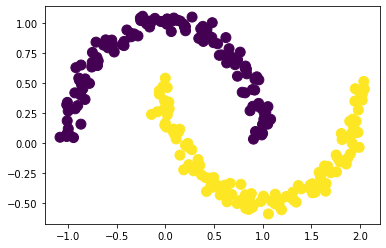

In [3]:
plt.scatter(X[:,0], X[:,1], c = y, s=100)
plt.show()

# Train Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# First test the accuracy with multiple hidden layers

model = Sequential()           # Sequential = Each neuron of one layer connected with each neuron of next layer
model.add(Dense(10, activation = 'sigmoid', input_dim=2))   # Dense Hidden Layer means fully connected. 10 neurons per layer
model.add(Dense(10, activation = 'sigmoid'))                # Adding multiple hidden layers
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1 , activation = 'sigmoid'))                # At final output I need only 1 value

In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )

In [7]:
model.get_weights()[0]
# We get 20 weights because each of the 2 inputs connect to 10 neurons of the 1st hidden layer (10 * 2 = 20)

array([[ 0.45690113, -0.35882208, -0.21778253,  0.30903298,  0.38628584,
        -0.2837154 , -0.15365845, -0.31729227, -0.12548214,  0.04472136],
       [ 0.3881424 , -0.04924858,  0.10061955, -0.01443797,  0.04960918,
         0.15672725, -0.44318455, -0.40585256, -0.18910766, -0.57734436]],
      dtype=float32)

In [8]:
# Store the above weights for later reference:
old_weights = model.get_weights()[0]

In [9]:
model.fit(x_train, y_train, epochs=100)
# Note that after 8th epoch, loss value becomes almost constant which results in Vanishing Gradient Problem

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.6997 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6956 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 92/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 94/100
7/7 [===============

In [10]:
# Get the new weights after building the model
new_weights = model.get_weights()[0]

# Compare the Old and New weights. There is very minute difference

In [11]:
new_weights

array([[ 0.45895168, -0.3566534 , -0.22506502,  0.31524876,  0.38640818,
        -0.28278336, -0.15559846, -0.30931765, -0.13320339,  0.05399686],
       [ 0.38650504, -0.05107119,  0.10648228, -0.01968148,  0.04933858,
         0.15601131, -0.4417948 , -0.41216668, -0.18323578, -0.5843336 ]],
      dtype=float32)

In [12]:
old_weights

array([[ 0.45690113, -0.35882208, -0.21778253,  0.30903298,  0.38628584,
        -0.2837154 , -0.15365845, -0.31729227, -0.12548214,  0.04472136],
       [ 0.3881424 , -0.04924858,  0.10061955, -0.01443797,  0.04960918,
         0.15672725, -0.44318455, -0.40585256, -0.18910766, -0.57734436]],
      dtype=float32)

In [13]:
# Check the learning rate
lr = model.optimizer.get_config()['learning_rate']
lr

0.001

In [14]:
# Convert the learning rate to percent change
gradient = (old_weights - new_weights)/lr
percent_change = abs(100*(old_weights-new_weights)/old_weights)
print(percent_change)
# Minute changes

[[4.4879487e-01 6.0439014e-01 3.3439300e+00 2.0113649e+00 3.1670466e-02
  3.2851154e-01 1.2625482e+00 2.5133371e+00 6.1532621e+00 2.0740637e+01]
 [4.2184758e-01 3.7008369e+00 5.8266287e+00 3.6317482e+01 5.4547375e-01
  4.5680708e-01 3.1358084e-01 1.5557691e+00 3.1050446e+00 1.2105844e+00]]


# To fix this problem, use any of the below methods:

# Method 1: Reduce the number of hidden layers

In [15]:
model2 = Sequential()           # Sequential = Each neuron of one layer connected with each neuron of next layer
model2.add(Dense(10, activation = 'sigmoid', input_dim=2))   # Dense Hidden Layer means fully connected. 10 neurons per layer
model2.add(Dense(10, activation = 'sigmoid'))                # Adding multiple hidden layers
model2.add(Dense(10, activation = 'sigmoid'))
model2.add(Dense(1 , activation = 'sigmoid'))                # At final output I need only 1 value

In [16]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )
model2.get_weights()[0]
# We get 20 weights because each of the 2 inputs connect to 10 neurons of the 1st hidden layer (10 * 2 = 20)

array([[ 0.51395553,  0.29164457, -0.45971018,  0.00895739,  0.44172353,
         0.45847005, -0.3118157 ,  0.2577986 ,  0.556806  , -0.4239715 ],
       [ 0.37493736, -0.6672539 , -0.46762687,  0.7040755 , -0.34462214,
        -0.17195642,  0.38901454, -0.20490533,  0.30279726, -0.24275133]],
      dtype=float32)

In [17]:
# Store the above weights for later reference:
old_weights2 = model2.get_weights()[0]

In [18]:
model2.fit(x_train, y_train, epochs=100)
# Note that loss value keeps on reducing up to the last epoch thereby reducing the impact of Vanishing Gradient Problem

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7100 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 1000us/step - loss: 0.6914 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5100
Epoch 11/100
7/7 [========

7/7 [==============================] - 0s 996us/step - loss: 0.4571 - accuracy: 0.8100
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.8100
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8100
Epoch 87/100
7/7 [==============================] - 0s 999us/step - loss: 0.4450 - accuracy: 0.8100
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8100
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8100
Epoch 90/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8100
Epoch 91/100
7/7 [==============================] - 0s 1000us/step - loss: 0.4296 - accuracy: 0.8100
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8100
Epoch 93/100
7/7 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8100
Epoch 94/100
7/7 [========

In [19]:
# Get the new weights after building the model
new_weights2 = model2.get_weights()[0]

In [20]:
# Check the learning rate
lr2 = model2.optimizer.get_config()['learning_rate']
lr2

0.001

In [21]:
# Convert the learning rate to percent change
gradient2 = (old_weights2 - new_weights2)/lr2
percent_change2 = abs(100*(old_weights2-new_weights2)/old_weights2)
print(percent_change2)
# Significant changes

[[ 140.09181   120.62496   109.13095  2034.0645    108.78681    89.68023
   172.32191   230.79965   103.00352   123.71599 ]
 [ 281.47568   121.18563   205.91722    22.283812  292.21594   544.03723
   264.39062   523.58734   281.75076   415.78995 ]]


# Method 2: Change the Activation Function from 'sigmoid' to 'relu'

In [22]:
# First test the accuracy with multiple hidden layers

model3 = Sequential()           # Sequential = Each neuron of one layer connected with each neuron of next layer
model3.add(Dense(10, activation = 'relu', input_dim=2))   # Dense Hidden Layer means fully connected. 10 neurons per layer
model3.add(Dense(10, activation = 'relu'))                # Adding multiple hidden layers
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(1 , activation = 'sigmoid')) # No need to change it in the last hidden layer as the output will be 0 or 1 here

In [23]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )
model3.get_weights()[0]
# We get 20 weights because each of the 2 inputs connect to 10 neurons of the 1st hidden layer (10 * 2 = 20)

array([[-0.3682876 , -0.41917232, -0.36246863, -0.51950645, -0.27421314,
        -0.4615324 , -0.41363978,  0.15740973, -0.402262  ,  0.39492005],
       [-0.13176167,  0.69669265, -0.3866923 , -0.61544883,  0.14110816,
         0.32514924,  0.06273746, -0.51373386,  0.63674647,  0.02457398]],
      dtype=float32)

In [24]:
# Store the above weights for later reference:
old_weights3 = model3.get_weights()[0]

In [25]:
model3.fit(x_train, y_train, epochs=100)
# Note that loss value is minimised and accuracy is 100%

Epoch 1/100
7/7 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4300
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5350
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.7900
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6600
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6900
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.7650
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7800
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.7950
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.8150
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7950
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 3.1132e-04 - accuracy: 1.0000
Epoch 84/100
7/7 [==============================] - 0s 1ms/step - loss: 2.9508e-04 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 1ms/step - loss: 2.8381e-04 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 2ms/step - loss: 2.7162e-04 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 1ms/step - loss: 2.5892e-04 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 0s 1ms/step - loss: 2.4432e-04 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 2ms/step - loss: 2.3223e-04 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 2.2184e-04 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 0s 1ms/step - loss: 2.1458e-04 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 2.0794e-04 - accuracy: 

In [26]:
# Get the new weights after building the model
new_weights3 = model3.get_weights()[0]

In [27]:
# Check the learning rate
lr3 = model3.optimizer.get_config()['learning_rate']
lr3

0.001

In [28]:
# Convert the learning rate to percent change
gradient3 = (old_weights3 - new_weights3)/lr3
percent_change3 = abs(100*(old_weights3-new_weights3)/old_weights3)
print(percent_change3)
# Significant changes

[[ 35.01251    22.147198    4.9264584  18.899559   16.977608    6.7661953
   21.5092     75.86525    44.09538    54.28038  ]
 [120.46381    13.535548    1.4499154  15.065355   54.997704    6.2474847
   27.17787    17.358683   18.039877  589.06647  ]]


# Hence Vanishing Gradient Problem can be minimised by:

# 1) Reducing the number of hidden layers 

# 2) Changing the activation function to RELU